In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from utils.plot_utils import plot_iterations, plot_cobweb

# General framework for a map, iterating a map and visualize iteration results

A `map`, `function` or `rule` is a `system` that in general has:
- a system `state` defined by a set of variables $V$, and
- some system `properties` defined by a set of parameters $P$

where the output, $V' = F(V, $**$P)$

**Note** that the number of variables $V$ and number of parameters $P$ can be different for different maps.

## Iterate
The basic idea of a `iterated map` is to define a set of variables $V_{t=0}$ as `initial condition`, and then in a sequence of $n$ steps to update this set $V_{t}$ according to a fixed rule or map $V_{t+1} = F(V_{t}, $**$P)$ to obtain a `trajectory` to obtain: $T_{n}=[V_{t=0}, V_{t=1}, ..., V_{t=n-1}]$


In [3]:
def iterate(func: Callable, V: np.array, n: int = 0, **P) -> np.array:

    if not isinstance(V, np.ndarray):
        return iterate(func, np.array(V), n, **P)
    else:    
        T = [V]
        for t in range(1,n):
            T.append(func(T[-1], **P))
        return np.array(T)

The whole history or trajectory becomes available by this process of functional iteration - a `feedback-loop`, where the results of each timestep are input for the next timestep.

## Logistic map
The logistic map has one `parameter` $r$, the reproduction rate and one variable $x$ the relative population size. These are set as parameters and variables by:

- $V$ = \<SOME NUMBER>
- $P$ = {'$r$': \<SOME NUMBER>\}

Using the `iterate` method as trajectory `T` is calculated and using the `plot_iterations` method the trajectory `T` is visualized.


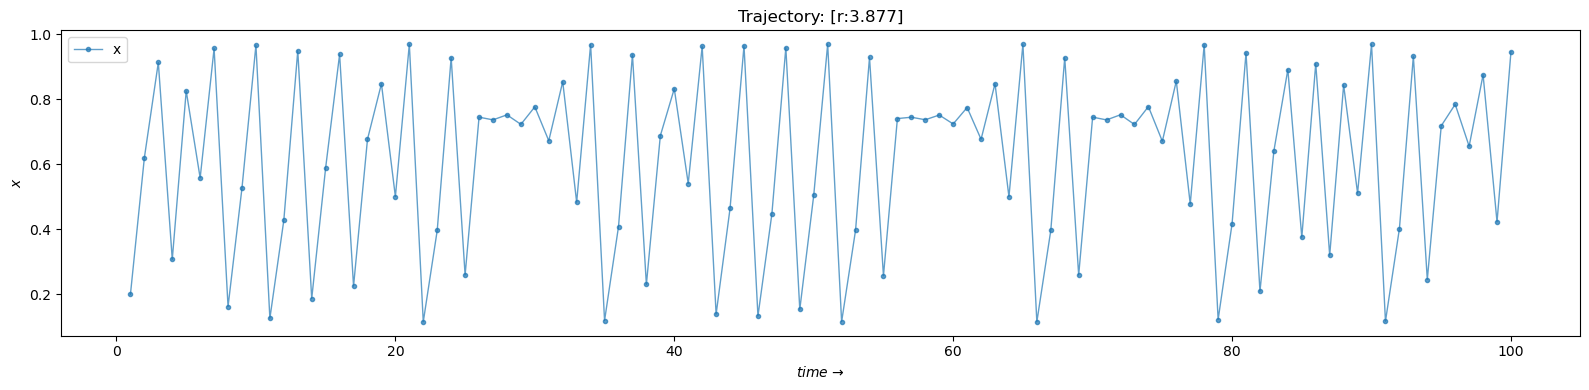

In [7]:
def logistic_map(V: np.ndarray, r=3.0) -> np.ndarray:
    """The implementation of a relative population system with:
    
    -  variable `x` and,
    -  parameter `r`
    that maps to the output variable x_dot
    """

    x = V  # relative population size
    x_dot = r * x * (1 - x)
    return x_dot

def get_param_str(**parameters):
    if parameters:
        return '['+ (', '.join(f'{k}:{v:.4g}' for k, v in parameters.items())) + ']'
    else:
        return ''

def plot_iterations(T: np.ndarray, labels=['x','y','z'], ax=None, figsize=(16,4), **parameters):
    _ax = ax if ax else plt.subplots(1, 1, figsize=figsize)[1]

    if T.ndim > 1:
        for i in range(T.shape[1]):
            plot_iterations(T[:,i], labels=[labels[i]], ax=_ax, **parameters)
    else:
        n = range(1, T.size+1)

        _ax.plot(n, T, marker='.', alpha=0.7, linewidth=1, label=labels[0])
        _ax.set_ylabel(_ax.get_ylabel() + (', ' if _ax.get_ylabel() else '') + f'${labels[0]}$')

    _ax.legend(loc='upper left')
    _ax.set_xlabel(f'$time$ $→$')
    _ax.set_title(f'Trajectory: {get_param_str(**parameters)}')
    if not ax:
        plt.tight_layout()
    return ax


P={'r': 3.8768}
x0 = 0.2
T = iterate(logistic_map, V=x0, n=100, **P)

plot_iterations(T, **P)

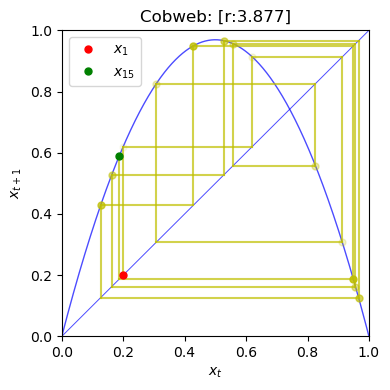

In [6]:
 def plot_cobweb(func: Callable, T: np.ndarray, ax=None, figsize=(4,4), **parameters):
    assert T.ndim==1, 'trajectory should be 1 dimensional'
    _ax = ax if ax else plt.subplots(1, 1, figsize=figsize)[1]
    
    # plot map
    linspace = np.linspace(0., 1., 1000)
    linspace_dot = func(linspace, **parameters)
    _ax.plot(linspace, linspace_dot, c='b', alpha=0.7, lw=1)
    _ax.plot(linspace, linspace, c='b', alpha=0.7, lw=0.7)
    #plot timeseries Trajectory
    # t = range(1, T.size+1)
    for i in range(T.size-2):
        _ax.plot([T[i], T[i]], [T[i], T[i+1]], c='y', alpha=0.7)
        _ax.plot([T[i]], [T[i+1]], 'oy', ms=5, alpha=(i+1)/T.size)
        _ax.plot([T[i], T[i+1]], [T[i+1], T[i+1]], c='y', alpha=0.7)
    _ax.plot([T[-2], T[-2]], [T[-2], T[-1]], c='y', alpha=0.7)
    _ax.plot([T[0]], [T[0]], 'or', ms=5, label=f'$x_{{1}}$')
    c = 'g' if T.size>1 else 'y'
    _ax.plot([T[-2]], [T[-1]], 'og', ms=5, label=f'$x_{{{T.size}}}$')

    _ax.set_title(f'Cobweb: {get_param_str(**parameters)}')
    _ax.set_ylabel('$x_{t+1}$')
    _ax.set_xlabel('$x_{t}$')
    _ax.set_xlim(0., 1.)
    _ax.set_ylim(0., 1.)
    _ax.legend(loc="upper left")
    if not ax:
        plt.tight_layout()
    return ax


T = iterate(logistic_map, V=x0, n=15, **P)
plot_cobweb(logistic_map, T, **P)

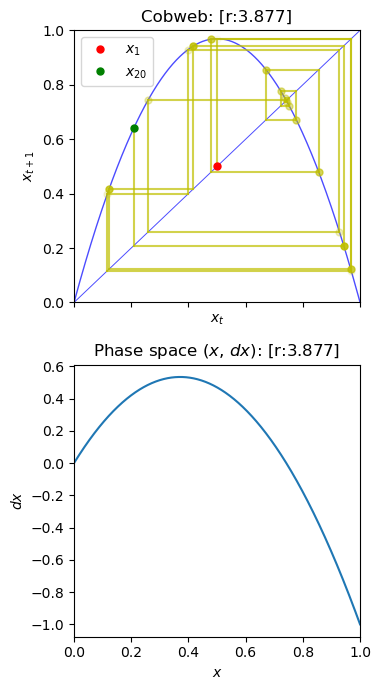

In [8]:
def plot_phase_space(func: Callable, limit=(0., 1.), ax=None, figsize=(4,4), **parameters):
    assert T.ndim==1, 'trajectory should be 1 dimensional'
    _ax = ax if ax else plt.subplots(1, 1, figsize=figsize)[1]
    x_lin = np.linspace(limit[0], limit[1], 1000)
    x_lin_dot = logistic_map(x_lin, **parameters) 
    x_lin_dx = x_lin_dot - x_lin

    ax2.plot(x_lin, x_lin_dx)
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$dx$')
    ax2.set_title(f'Phase space ($x$, $dx$): {get_param_str(**parameters)}')
    if not ax:
        plt.tight_layout()
    return ax


x0=0.5
T = iterate(logistic_map, V=x0, n=20, **P)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 7), sharex=True)
plot_cobweb(logistic_map, T, ax=ax1, **P)
plot_phase_space(logistic_map, ax=ax2, **P)
plt.tight_layout()

## Predator Prey model

The same holds for other maps. Here a predator-prey map with more parameters $P$ and two variables $V$: $x$ (preys) and $y$ (predators) is defined:

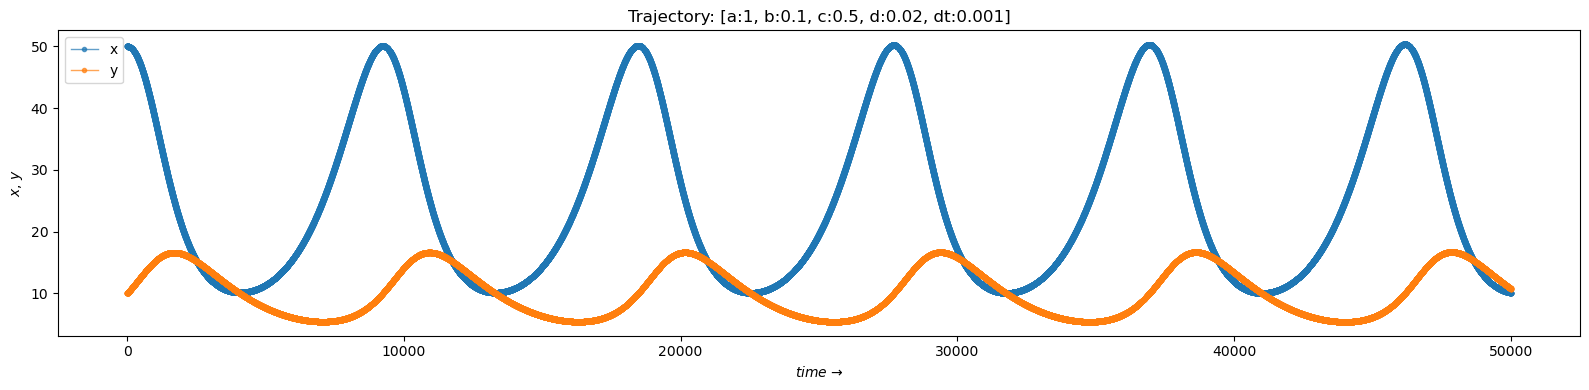

In [11]:
def pred_prey_map(V: np.ndarray, a=1, b=0.1, c=0.5, d=0.02, dt=0.001) -> np.ndarray:
    """
    The implementation of a predator prey system with parameters `P` and variables `V`.

    Parameters:
    - a: birth rate of rabbits
    - b: death rate of rabbits due to predation
    - c: natural death rate of foxes
    - d: factor that describes how many eaten rabbits give birth to a new fox
    - dt: the time increment for this differential equation

    data are variables:
    - x: number of rabbits
    - y: number of foxes
    
    Output [x_dot, y_dot]
    """
    assert V.ndim==1, 'data should be 1 dimensional'

    # Map the states into local variable names
    x = V[0]
    y = V[1]

    # evaluate the current differentials
    x_dot = x + (x * (a - b * y)) * dt
    y_dot = y + (-y * (c - d * x)) * dt

    return np.array([x_dot, y_dot])


# initial conditions for the rabbit (x) and fox (y)
x0 = 50 # rabbits
y0 = 10 # foxes
V = [x0, y0]

# definition of lotka-volterra parameters
a = 1     # birth rate of rabbits
b = 0.1   # death rate of rabbits due to predation
c = 0.5   # natural death rate of foxes
d = 0.02  # factor that describes how many eaten rabbits give birth to a new fox

n = 50
timestep = 0.001
P = {'a':a, 'b':b, 'c':c ,'d':d, 'dt':timestep}

T = iterate(pred_prey_map, V, n=int(n/timestep), **P)

plot_iterations(T, **P)

### Phase plot
For the predator-prey model of foxes and rabbits a plot of the `Phase space` shows the population sizes revolve in a repeating cycle, a `limit cycle`.

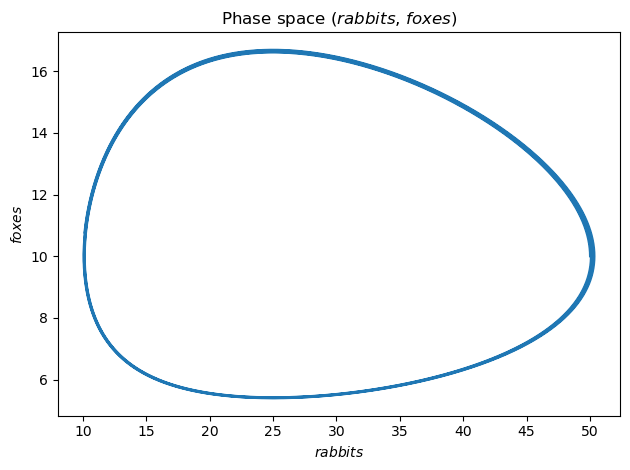

In [12]:
plt.plot(T[:,0], T[:,1])
plt.xlabel('$rabbits$')
plt.ylabel('$foxes$')
plt.title('Phase space ($rabbits$, $foxes$)')
plt.tight_layout()